# Cereal Stocks and Their Relation To Futures Using Ingredient List
## Author: Gerardo Salazar
#### Date: 2018-02-16

### Introduction:
This has probably been plundered to hell, but I reckon we could try making a pairs trading algorithm on corn, soy, wheat, and match it with Kellogs and Tyson. Using these commodities, we might be able to generate a successful pairs trading algorithm. We will try using traditional methods first (johansen test, etc.)

#### Find out if the percentage change is correlated to commodity changes

In [93]:
from quantopian.research.experimental import continuous_future

from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera, beta, linregress

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import Quandl

# Food tickers
CEREALS = ['POST', 'K'] # Post and Kellogs, big cereal producers
CHICKEN = ['TSN'] # Tyson Chicken

# Commodities
CEREAL_COMMODITIES = ['MW', 'CM', 'SB'] # Wheat, Corn, and Sugar futures
HONEY_BUNCHES_OF = ['OA']#TS
CHICKEN_FOOD = ['SM'] # Soybean Meal futures

DEFAULT_FIELD = 'close_price'
FREQUENCY = 'daily'
START = '2016-01-01'
END = '2017-01-01'

In [95]:
Quandl.get?

In [85]:
LIVESTOCK = get_pricing(CHICKEN, fields=DEFAULT_FIELD, frequency=FREQUENCY, start_date=START, end_date=END)
LIVESTOCK_FOOD = get_pricing(continuous_future(CHICKEN_FOOD[0]), fields=DEFAULT_FIELD, frequency=FREQUENCY, start_date=START, end_date=END)

In [86]:
CEREAL_FEED = get_pricing([continuous_future(food) for food in CEREAL_COMMODITIES + HONEY_BUNCHES_OF], fields=DEFAULT_FIELD, frequency=FREQUENCY, start_date=START, end_date=END)
CEREAL_COMPANY = get_pricing(CEREALS, fields=DEFAULT_FIELD, frequency=FREQUENCY, start_date=START, end_date=END)
VX = get_pricing(continuous_future('VX'), frequency=FREQUENCY, fields=DEFAULT_FIELD, start_date=START, end_date=END)
SPY = get_pricing('SPY', frequency=FREQUENCY, fields=DEFAULT_FIELD, start_date=START, end_date=END)

In [91]:
JOINED_LIVESTOCK = LIVESTOCK_FOOD.to_frame().join(LIVESTOCK).fillna(method='ffill').pct_change().dropna()
JOINED_CEREAL = CEREAL_FEED.join(CEREAL_COMPANY).fillna(method='ffill').dropna()

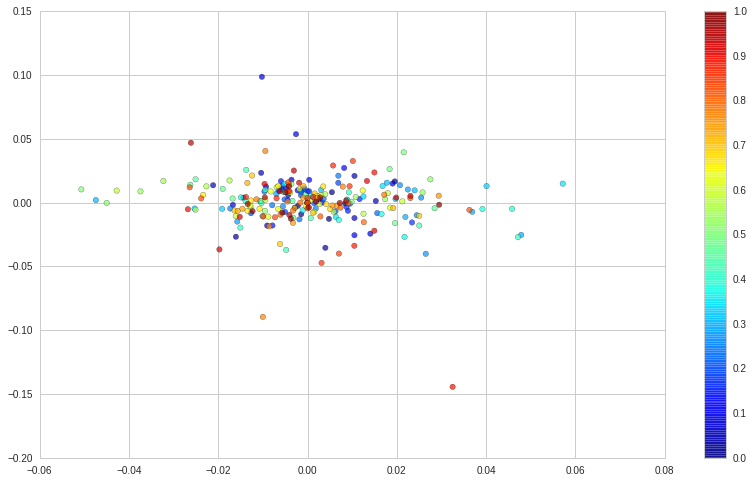

In [92]:
colors = np.linspace(0, 1, len(JOINED_LIVESTOCK[JOINED_LIVESTOCK.columns[0]]))
cm = plt.get_cmap('jet')
sc = plt.scatter(
    JOINED_LIVESTOCK[JOINED_LIVESTOCK.columns[0]], 
    JOINED_LIVESTOCK[JOINED_LIVESTOCK.columns[1]],
    s=30,
    c=colors,
    cmap=cm,
    edgecolor='k',
    alpha=0.7
)
cb = plt.colorbar(sc)
#cb.ax.set_yticklabels([str(p.date()) for p in JOINED_LIVESTOCK[JOINED_LIVESTOCK.columns[0]][::len(JOINED_LIVESTOCK[JOINED_LIVESTOCK.columns[0]])//9].index])

In [89]:
JOINED_CEREAL = JOINED_CEREAL.join(SPY)
JOINED_CEREAL = JOINED_CEREAL.join(VX)

In [2]:
# JOINED_CEREAL
# Output cell has been omitted to comply with Quantopian's terms of use

In [76]:
WHEAT = JOINED_CEREAL[JOINED_CEREAL.columns[0]].fillna(method='ffill').pct_change().dropna()
CORN = JOINED_CEREAL[JOINED_CEREAL.columns[1]].fillna(method='ffill').pct_change().dropna()
OATS = JOINED_CEREAL[JOINED_CEREAL.columns[2]].fillna(method='ffill').pct_change().dropna()

POST = JOINED_CEREAL[JOINED_CEREAL.columns[3]].fillna(method='ffill').pct_change().dropna()
KELLOGS = JOINED_CEREAL[JOINED_CEREAL.columns[4]].fillna(method='ffill').pct_change().dropna()

VX_JOINED = JOINED_CEREAL[JOINED_CEREAL.columns[-1]].fillna(method='ffill').pct_change().dropna()
SPY_JOINED = JOINED_CEREAL[JOINED_CEREAL.columns[-2]].fillna(method='ffill').pct_change().dropna()

In [77]:
def plot_scatter_linregress(price_series_x, price_series_y, linear_regression, title='Undefined'):
    x = np.linspace(price_series_x.min(), price_series_x.max(), num=price_series_x.size)
    y = (linear_regression.slope * x) + linear_regression.intercept
    
    plt.plot(x, y)
    plt.title('%s, R: %s, R^2: %s' % (title, linear_regression.rvalue, linear_regression.rvalue**2))
    
    cmap = plt.get_cmap('jet')
    gradient = np.linspace(0, 1, len(x))
    
    scatter = plt.scatter(price_series_x.values, price_series_y.values, s=50, c=gradient, cmap=cmap, alpha=0.7)
    plt.colorbar(scatter)
    
    return

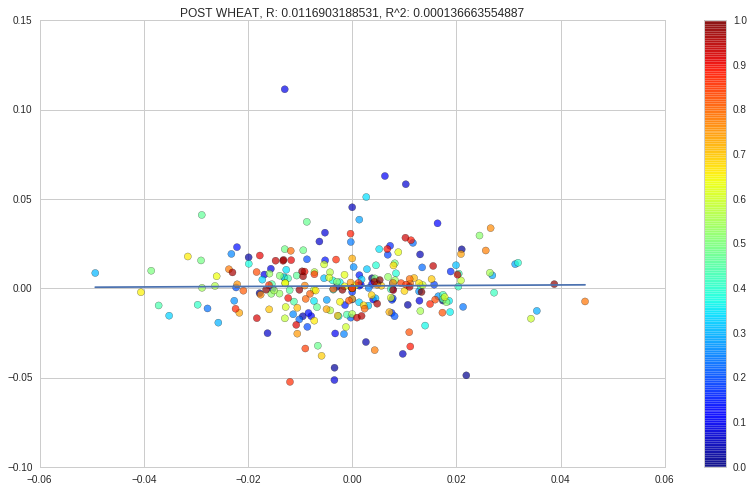

In [78]:
plot_scatter_linregress(WHEAT, POST, linregress(WHEAT, POST), title='POST WHEAT')

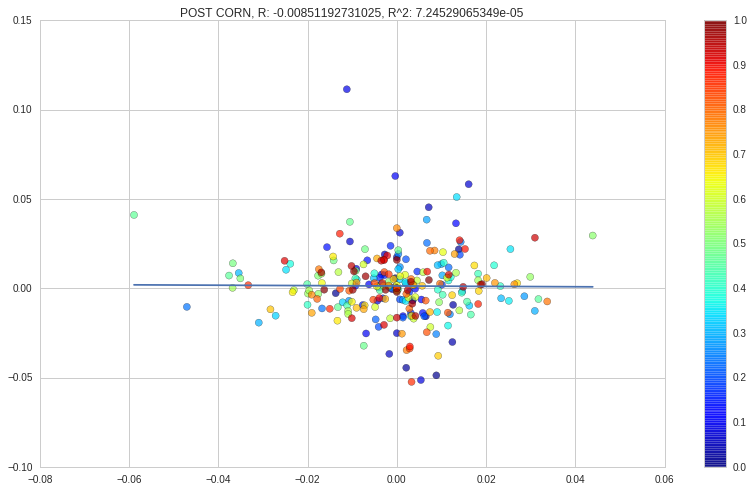

In [79]:
plot_scatter_linregress(CORN, POST, linregress(CORN, POST), title='POST CORN')

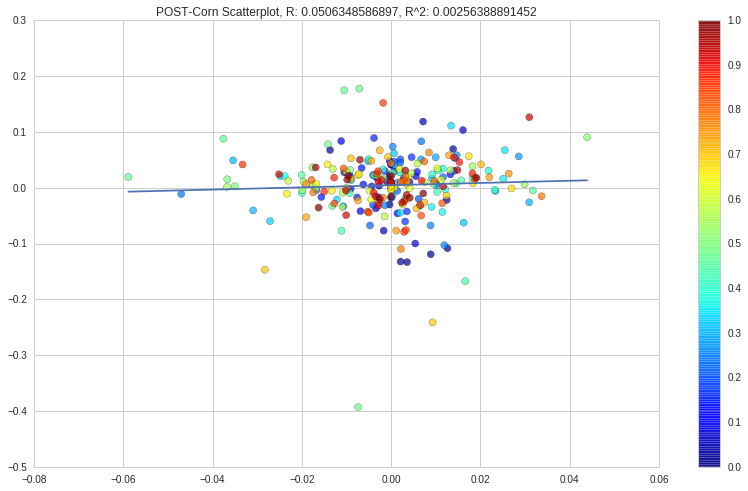

In [80]:
multi = (CORN)
x_formula = multi
company = POST - (VX_JOINED + SPY_JOINED)
plot_scatter_linregress(x_formula, company, linregress(x_formula, company), 'POST-Corn Scatterplot')
plt.xlabel('')

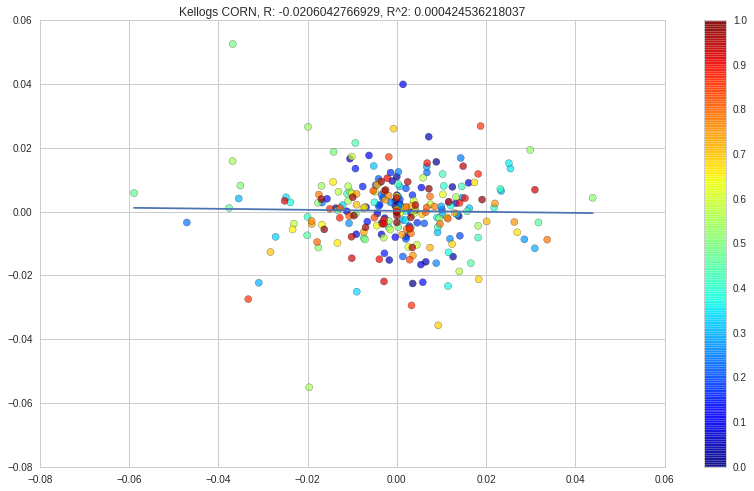

In [81]:
plot_scatter_linregress(CORN, KELLOGS, linregress(CORN, KELLOGS), title='Kellogs CORN')

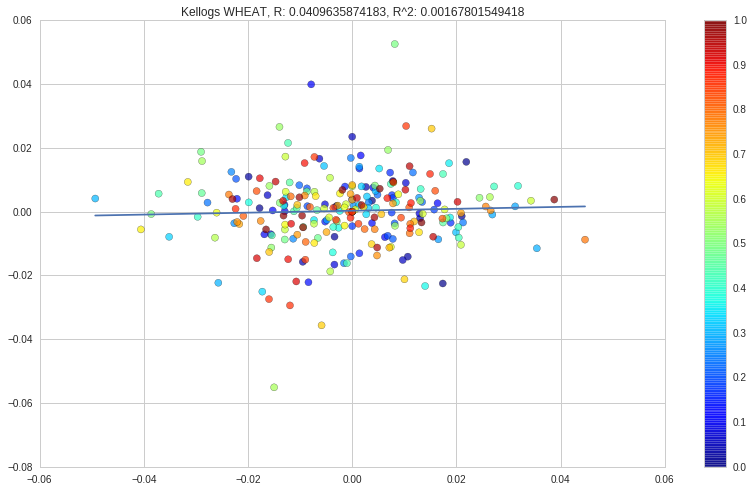

In [82]:
plot_scatter_linregress(WHEAT, KELLOGS, linregress(WHEAT, KELLOGS), title='Kellogs WHEAT')

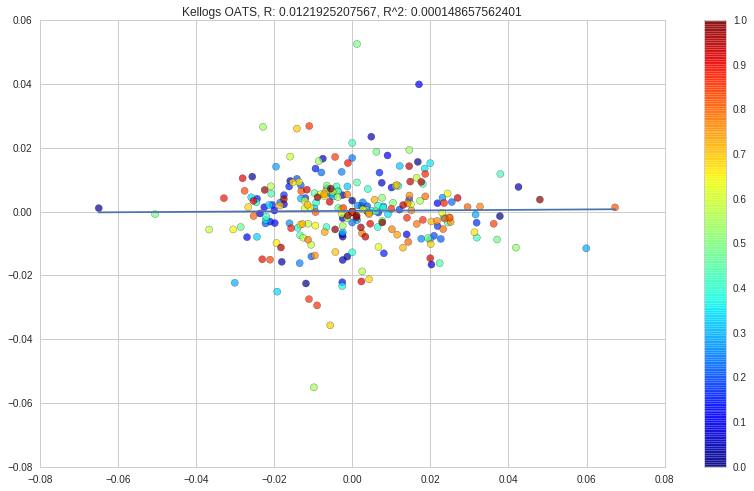

In [83]:
plot_scatter_linregress(OATS, KELLOGS, linregress(OATS, KELLOGS), title='Kellogs OATS')